### Aula 20 - Trading com cara e coroa e Monte Carlo
#### Leandro Guerra - Outspoken Market
Quer publicar seu artigo na área de finanças quantitativas? Acesse aqui:
 https://www.outspokenmarket.com/diurnalis.html 

In [1]:
# Carregando as bibliotecas

from datetime import datetime
import random
import yfinance as yf
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import sys
import time

In [28]:
# Get the data

stock_symbol = "PETR4.SA"

start = "2021-01-01"
end = datetime.today().strftime("%Y-%m-%d")

df1 = yf.download(stock_symbol, start, end)
df1["Returns"] = df1["Adj Close"].pct_change(1)
df1["Adj Low"] = df1["Low"] - (df1["Close"]-df1["Adj Close"])
df1["Adj High"] = df1["High"] - (df1["Close"]-df1["Adj Close"])
df1["Adj Open"] = df1["Open"] - (df1["Close"]-df1["Adj Close"])
#df1["Target"] = df1["Returns"].shift(-1)

[*********************100%***********************]  1 of 1 completed


In [37]:
num_sim = 10000
op_cost = 0.001
coins = np.random.randint(0, 2, size = (df1.shape[0], num_sim))
coins = np.where(coins == 0 , -1, coins)

#df_c_c = pd.DataFrame(coins[:,0]*df1["Returns"]-op_cost).cumsum()
#for i in range(1, num_sim):
#    sys.stdout.write('\r'+str(np.round(i/num_sim*100, 3))+ "%")
#    df_c_c = pd.concat([df_c_c, pd.DataFrame(coins[:,i]*df1["Returns"]-op_cost).cumsum()], axis = 1)
    
df_c_c = pd.DataFrame(
                        np.where(coins[:,0]*df1["Returns"] < - 0.02
                                 , -0.02
                                 , coins[:,0]*df1["Returns"]
                                )-op_cost).cumsum()
for i in range(1, num_sim):
    sys.stdout.write('\r'+str(np.round(i/num_sim*100, 3))+ "%")
    df_c_c = pd.concat([df_c_c, pd.DataFrame(np.where(coins[:,i]*df1["Returns"] < - 0.02
                                 , -0.02
                                 , coins[:,i]*df1["Returns"]
                                )-op_cost).cumsum()], axis = 1)

99.99%

In [38]:
# Analizing accumulated returns distribution

fig = go.Figure(data=[go.Histogram(x = df_c_c.iloc[-1]*100)])

fig.update_layout(height = 600, width = 600
                  , title_text = "Heads & Tails Returns Distribution"
                  , font_color = "blue"
                  , title_font_color = "black"
                  , xaxis_title = "Returns"
                  , yaxis_title = "Frequency"
                  , font = dict(size = 15, color = "Black")
                 )

fig.update_layout(hovermode = "x")
fig.show()

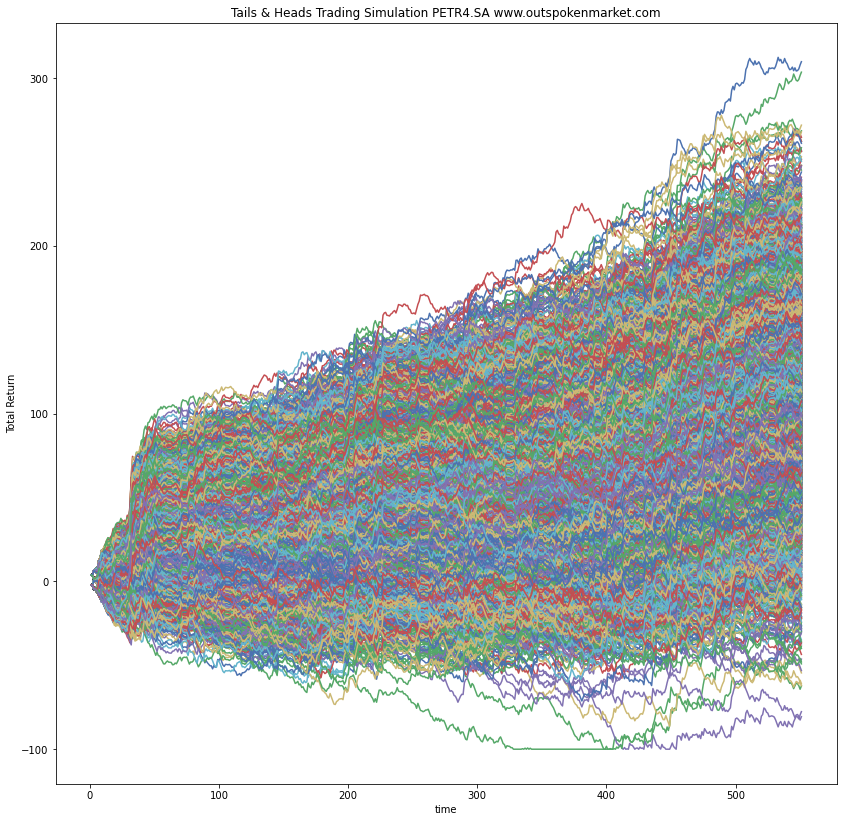

In [39]:
for col in df_c_c.columns:
    df_c_c[col] = np.where(df_c_c[col] < -1, -1, df_c_c[col])

with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (14, 14))
    plt.plot(df_c_c*100, linewidth = 1.5)
    plt.xlabel("time")
    plt.ylabel("Total Return")
    plt.title("Tails & Heads Trading Simulation " + stock_symbol + " www.outspokenmarket.com")

In [36]:
# Some intesresting stats
print("For the stock " + stock_symbol + " according to a tails & heads simulation,")
print("with " + str(num_sim) + " tosses, we could have:")
print()
print("---------------------------------------------------------")
print("Average total return: " + str(round(np.mean(df_c_c.iloc[-1]*100), 2)) + "%")
print("Max total return was: " + str(round(np.max(df_c_c.iloc[-1]*100), 2)) + "%")
print()
print("With: ")
print("    50% probability, the total return will be higher than " + str(round(np.median(df_c_c.iloc[-1]*100), 2)) + "%")
print("    25% probability, the total return will be higher than " + str(round(np.percentile(df_c_c.iloc[-1]*100, 75), 2)) + "%")
print("     5% probability, the total return will be higher than " + str(round(np.percentile(df_c_c.iloc[-1]*100, 95), 2)) + "%")
print("---------------------------------------------------------")

print()
print("Time interval for the simulation: " + start  + " à " + end)

For the stock PETR4.SA according to a tails & heads simulation,
with 1000 tosses, we could have:

---------------------------------------------------------
Average total return: 107.13%
Max total return was: 271.82%

With: 
    50% probability, the total return will be higher than 108.09%
    25% probability, the total return will be higher than 136.91%
     5% probability, the total return will be higher than 177.82%
---------------------------------------------------------

Time interval for the simulation: 2021-01-01 à 2023-03-22
